In [12]:
import numpy as np

from cwt import *
from matplotlib import pyplot as plt

In [3]:
# Define parameters
duration = 10  # Duration of the signal in seconds
sampling_rate = 50  # Sampling rate in Hz

# Generate time vector
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Generate signal with varying frequencies
o_signal = np.sin(2 * np.pi * 3 * t) * (t <= 5) + np.sin(2 * np.pi * 5 * t) * ((t > 5) & (t<=7)) + np.sin(2 * np.pi * 1 * t) * (t > 7)




17.0
[0.03553063 0.0502479  0.07106127 0.10049581 0.14212253 0.20099161
 0.28424507 0.40198323 0.56849013 0.80396646 1.13698027 1.60793291
 2.27396053 3.21586582 4.54792106 6.43173165 9.09584213]


/var/folders/38/7n1_2vzs5yj4rjtfy6_m6d_00000gn/T/ipykernel_20038/1731384621.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


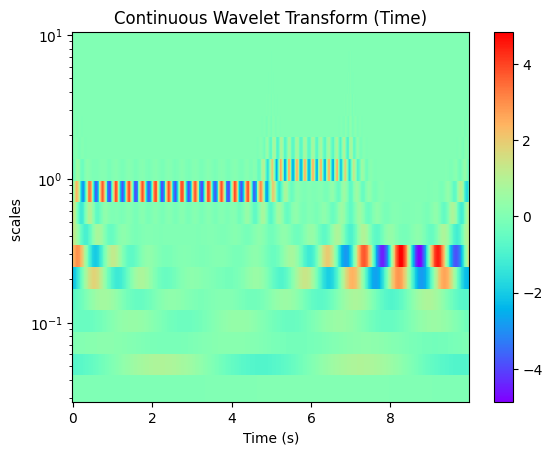

In [31]:
minFrq = .2
maxFrq = 24.0
nf = 30
w0 = 8
dt = 1/sampling_rate
dj = .5

ftime = np.logspace(np.log10(minFrq), np.log10(maxFrq), nf)
wave_form = 'morlet'

scales = scales_from_fourier(ftime, wave_form, w0)

s0 = (2*dt* (w0 + np.sqrt(2 + w0))) / (4 *np.pi)
J = np.ceil((1/dj )* np.log2((duration * sampling_rate * dt) / s0))
print(J)
scales = s0 * 2**(np.arange(J) * dj)
print(scales)

transform = cwt(o_signal, dt, scales, wave_form,w0 )

real_transform_values = transform.real

fig, axs = plt.subplots()
pcm = axs.pcolormesh(t, scales[::-1], real_transform_values, shading="nearest", cmap="rainbow")
axs.set_yscale("log")
axs.set_xlabel("Time (s)")
axs.set_ylabel("scales ")
axs.set_title("Continuous Wavelet Transform (Time)")
fig.colorbar(pcm, ax=axs)
fig.show()

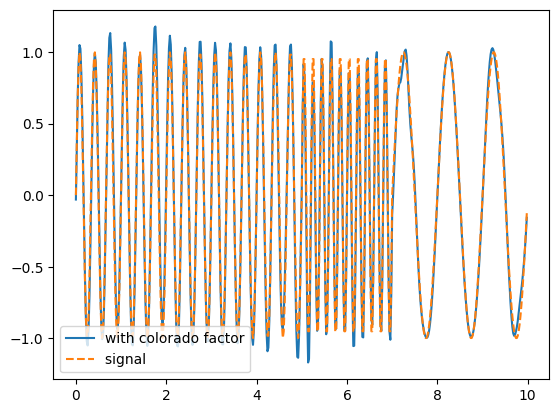

In [33]:
inverse = icwt(transform, dt,scales, wave_form,w0)

colorado_factor = (dj *np.sqrt(dt)) / (.7511 * .5758)

inverse_w_factor = colorado_factor * inverse

#plt.plot(t, inverse, label="no reconstruction factor")
plt.plot(t, inverse_w_factor, label="with colorado factor")
plt.plot(t, o_signal, ls="--", label="signal ")
plt.legend()